In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#librerias para relizar aprendizaje automatico 
##para separar el conjunto de datos en entrenamiento y test 
from sklearn.model_selection import train_test_split 

#construir el modelo con el algoritmo de regresion lineal
from sklearn.linear_model import LinearRegression

#para determinar el rendimiento del modelo con las metricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#para sacar un reporte estadistico que podemos usar para determinar la importancia de las variables explicativas 
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/kc_house_data.csv')

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

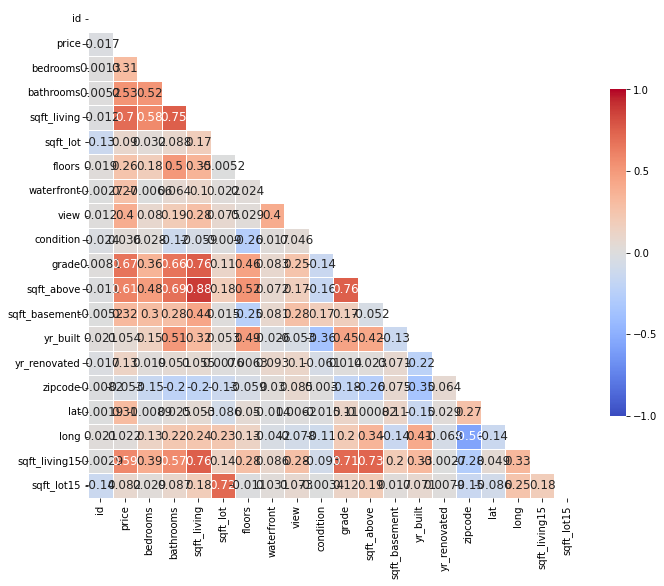

In [6]:
corr_matrix = df.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

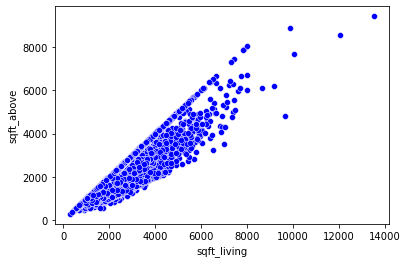

In [7]:
sns.scatterplot(data = df, x = "sqft_living", y = "sqft_above", color = 'blue', marker='o')
plt.show()

In [8]:
train_data = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/kc_house_train_data.csv')

In [9]:
(len(train_data) / len(df)) * 100

80.43307268773422

In [10]:
test_data = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/kc_house_test_data.csv')

In [11]:
(len(test_data) / len(df)) * 100

19.566927312265765

3. Write a generic function that accepts a column of data (e.g, an SArray) ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution from lecture to calculate the slope and intercept. e.g. in python:

In [12]:
def simple_linear_regression(input_feature, output):
    mean_Ys = np.mean(output)
    mean_Xs = np.mean(input_feature)
    mean_product = np.mean(np.array(input_feature) * np.array(output))
    mean_X_squared = np.mean(np.array(input_feature) ** 2)
    
    numerator = mean_product - (mean_Ys * mean_Xs)
    denominator = mean_X_squared - (mean_Xs * mean_Xs)
    slope = numerator / denominator
    intercept = mean_Ys - (slope * mean_Xs)
    
    return(intercept, slope)

In [13]:
intercept, slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

5. Write a function that accepts a column of data ‘input_feature’, the ‘slope’, and the ‘intercept’ you learned, and returns an a column of predictions ‘predicted_output’ for each entry in the input column. e.g. in python:

In [14]:
def get_regression_predictions(input_feature, intercept, slope):
    df = pd.DataFrame({'X': input_feature})
    recta = lambda m,x,b: b + (m*x)
    df['predicted'] = df['X'].apply(lambda x: recta(slope,x,intercept))
    predicted_output = df['predicted']
    return(predicted_output)

In [15]:
get_regression_predictions(train_data['sqft_living'], intercept, slope)

0        285595.351691
1        677518.138777
2        169992.227442
3        505523.246603
4        426574.771506
             ...      
17379    942559.448030
17380    322250.000843
17381    384280.945562
17382    404018.064336
17383    240481.937350
Name: predicted, Length: 17384, dtype: float64

6. Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?

In [16]:
recta = lambda m,x,b: b + (m*x) 
y = recta(slope,2650,intercept)
print(y)

700074.8459475139


In [17]:
# Los valores reales son:
df[df['sqft_living'] == 2650].head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
297,8079030390,20150304T000000,446500.0,3,2.50,2650,7286,2.0,0,0,...,8,2650,0,1990,0,98059,47.5084,-122.154,2400,7220
1708,9510930350,20141212T000000,429000.0,4,2.50,2650,9301,2.0,0,0,...,9,2650,0,2001,0,98001,47.3477,-122.271,2730,8688
2306,3145600045,20150225T000000,302000.0,6,2.00,2650,4621,1.5,0,0,...,8,2650,0,1911,0,98118,47.5543,-122.275,1640,4879
2343,5634500036,20140820T000000,459000.0,5,2.50,2650,12987,1.0,0,0,...,7,1350,1300,1979,0,98028,47.7482,-122.244,2160,12726
2707,4027701294,20150129T000000,485000.0,3,2.75,2650,12350,1.0,0,0,...,7,1470,1180,1975,0,98028,47.7669,-122.268,1950,14075


7. Write a function that accepts column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’  and outputs the Residual Sum of Squares (RSS). e.g. in python:

In [18]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    df = pd.DataFrame( {'X': input_feature, 'Y_real': output})
    predictions = get_regression_predictions(input_feature, intercept, slope)
    df['Y_pred'] = predictions
    df['residual'] = df['Y_real'] - df['Y_pred']
    RSS = sum(df['residual'] ** 2)
    return(RSS)

8. Quiz Question: According to this function and the slope and intercept from (4) What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?

In [19]:
RSS_training_data = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'],intercept,slope)
print(RSS_training_data)

1201918354177285.2


9. Note that although we estimated the regression slope and intercept in order to predict the output from the input, since this is a simple linear relationship with only two variables we can invert the linear function to estimate the input given the output!

Write a function that accept a column of data:‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the column of data: ‘estimated_input’. Do this by solving the linear function output = intercept + slope*input for the ‘input’ variable (i.e. ‘input’ should be on one side of the equals sign by itself). e.g. in python:

In [20]:
def inverse_regression_predictions(output, intercept, slope):
    inversa = lambda m,y,b: (y-b) / m 
    df = pd.DataFrame({'Y': output})
    df['estimated_input'] = df['Y'].apply(lambda y: inversa(slope,y,intercept))
    estimated_input = df['estimated_input']
    
    return(estimated_input)

10. Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?

In [21]:
estimated = inverse_regression_predictions([800000],intercept,slope)
print(estimated)

0    3004.396245
Name: estimated_input, dtype: float64


In [22]:
#valores reales
df[df['price'] == 800000].head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
238,326069104,20140701T000000,800000.0,3,3.50,3830,221284,2.0,0,0,...,10,3530,300,1993,0,98077,47.7641,-122.023,2920,148539
901,7574910860,20140811T000000,800000.0,4,2.50,2570,50308,1.5,0,0,...,10,2570,0,1993,0,98077,47.7418,-122.039,3420,37891
923,3456000160,20140623T000000,800000.0,3,2.25,2380,11824,1.0,0,0,...,9,1450,930,1972,0,98040,47.5371,-122.218,2750,11491
1602,3623500135,20150326T000000,800000.0,4,2.25,2350,10664,1.0,0,1,...,7,1510,840,1952,0,98040,47.5743,-122.238,2350,10140
1716,9839300875,20140514T000000,800000.0,3,1.00,1700,4400,1.5,0,0,...,8,1700,0,1906,0,98122,47.6120,-122.292,1610,4180


11. Instead of using ‘sqft_living’ to estimate prices we could use ‘bedrooms’ (a count of the number of bedrooms in the house) to estimate prices. Using your function from (3) calculate the Simple Linear Regression slope and intercept for estimating price based on bedrooms. Save this slope and intercept for later (you might want to call them e.g. bedroom_slope, bedroom_intercept).

In [23]:
bedroom_intercept, bedroom_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])
print(bedroom_intercept)
print(bedroom_slope)

109473.17762295791
127588.95293398833


12. Now that we have 2 different models compute the RSS from BOTH models on TEST data.

In [24]:
RSS_test_data_1 = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'],intercept,slope)
print(RSS_test_data_1)
RSS_test_data_2 = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'],bedroom_intercept, bedroom_slope)
print(RSS_test_data_2)

275402933617813.03
493364585960301.6


In [25]:
RSS_test_data_1 < RSS_test_data_2

True

13. Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.

Respuesta : El modelo que tiene el RSS mas pequeño respecto al dataset de validación es el modelo 1,

** sqft_living vs price. 


In [26]:
df['price_pred'] = get_regression_predictions(df['sqft_living'], intercept, slope)

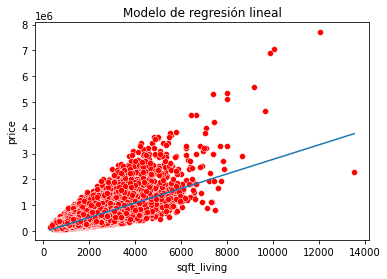

In [27]:
sns.scatterplot(data = df, x = "sqft_living", y = "price", color = 'red', marker='o')
sns.lineplot(data = df, x = 'sqft_living', y = 'price_pred')
plt.title("Modelo de regresión lineal")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()
plt.show()

In [28]:
test_data['price_pred'] = get_regression_predictions(test_data['sqft_living'], intercept, slope)

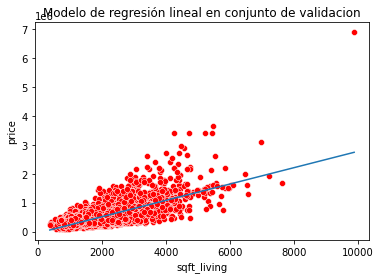

In [29]:
sns.scatterplot(data = test_data, x = "sqft_living", y = "price", color = 'red', marker='o')
sns.lineplot(data = test_data, x = 'sqft_living', y = 'price_pred')
plt.title("Modelo de regresión lineal en conjunto de validacion")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()
plt.show()

<AxesSubplot:xlabel='price'>

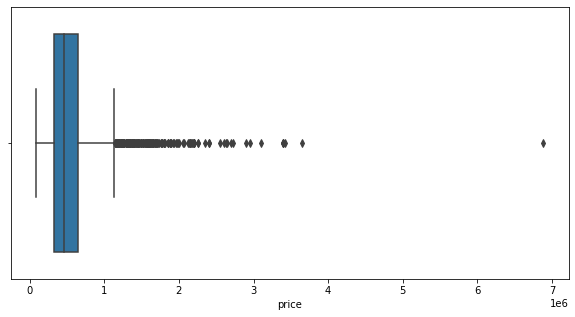

In [33]:
plt.figure(figsize = (10,5))
sns.boxplot(x=test_data["price"])

# Quizz

Pregunta 1


Using your Slope and Intercept from predicting prices from square feet, what is the predicted price for a house with 2650 sqft? Use American-style decimals without comma separators (e.g. 300000.34), and round your answer to 2 decimal places. Do not include the dollar sign. You do not need to round your answer.


In [34]:
predict = get_regression_predictions([2650], intercept, slope)
print(predict)

0    700074.845948
Name: predicted, dtype: float64


Pregunta 2

Using the learned slope and intercept from the squarefeet model, what is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?

In [35]:
RSS = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'],intercept,slope)
print(RSS)

1201918354177285.2



Pregunta 3

According to the inverse regression function and the regression slope and intercept from predicting prices from square-feet, what is the estimated square-feet for a house costing $800,000? You do not need to round your answer.

In [36]:
estimated = inverse_regression_predictions([800000],intercept,slope)
print(estimated)

0    3004.396245
Name: estimated_input, dtype: float64
